In [1]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import numpy as np
import random
import json

# Plots of Daily Articles Across the Study Period

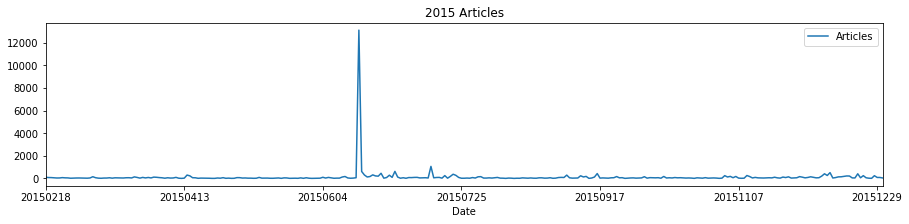

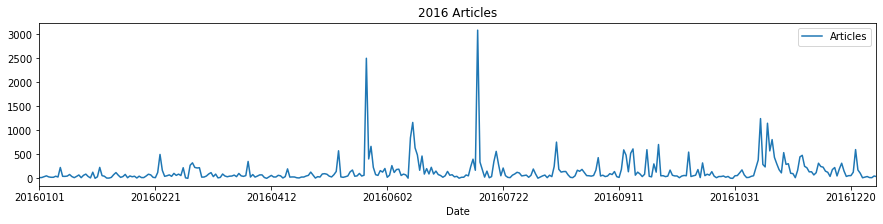

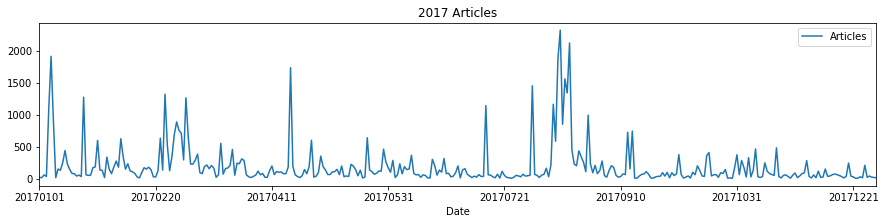

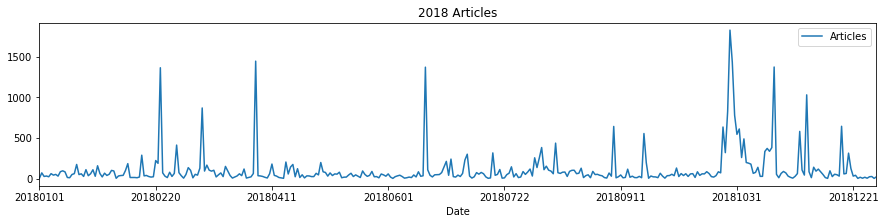

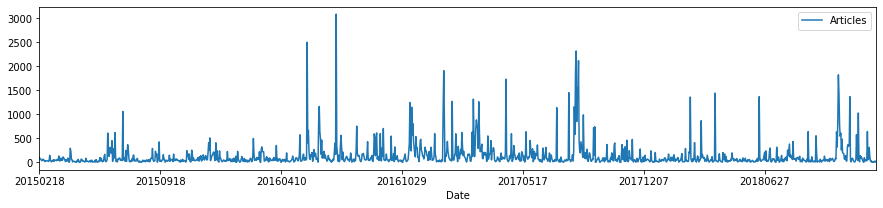

In [7]:
df_2015 = pd.read_csv(f'./yearly/overview_2015.csv')
df_2016 = pd.read_csv(f'./yearly/overview_2016.csv')
df_2017 = pd.read_csv(f'./yearly/overview_2017.csv')
df_2018 = pd.read_csv(f'./yearly/overview_2018.csv')

df_2015['Date'] = df_2015['Date'].astype(str)
df_2016['Date'] = df_2016['Date'].astype(str)
df_2017['Date'] = df_2017['Date'].astype(str)
df_2018['Date'] = df_2018['Date'].astype(str)

all_yrs = pd.concat([df_2015, df_2016, df_2017, df_2018])

df_2015.plot(x='Date', y='Articles', title='2015 Articles', figsize=(15,3))
df_2016.plot(x='Date', y='Articles', title='2016 Articles', figsize=(15,3))
df_2017.plot(x='Date', y='Articles', title='2017 Articles', figsize=(15,3))
df_2018.plot(x='Date', y='Articles', title='2018 Articles', figsize=(15,3))
all_yrs[all_yrs.Date != '20150618'].plot(x='Date', y='Articles', figsize=(15, 3))

# Identifying Emanuel African Methodist Episcopal Church Shooting as an Outlier
- There were a total of 13111 (i.e. sum(numarticles)) articles for 20150618. The next 3 highest values for a single day were 3090, 2504, and 2323 articles.

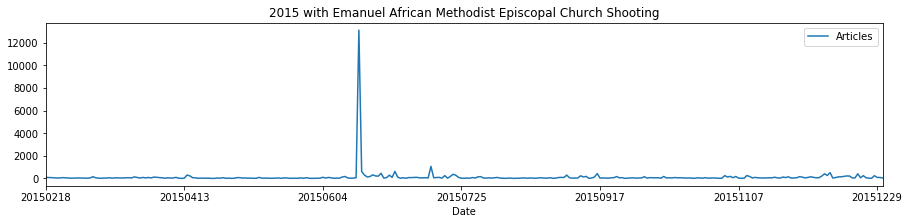

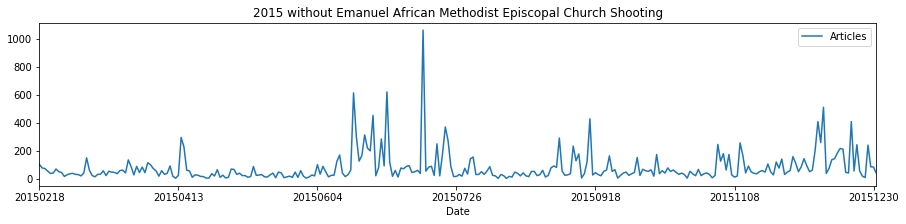

In [4]:
df_2015.plot(x='Date', y='Articles', title='2015 with Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))
df_2015[df_2015.Date != '20150618'].plot(x='Date', y='Articles', title='2015 without Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))

# Total Articles by Year
- If we remove the shooting at the Emanuel African Methodist Episcoal Church in 2015 as an outlier, there is a drastic jump between 2015 and 2016. We only start to get back to 2015 levels in 2018. 

Year
2015    23924
2016    53500
2017    69604
2018    40584
Name: Articles, dtype: int64


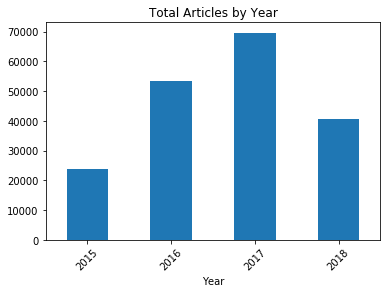

In [10]:
all_yrs_gb = all_yrs[all_yrs.Date != '20150618'].groupby('Year')['Articles'].agg('sum')
print(all_yrs_gb)
all_yrs_gb.plot(x='Year', kind='bar', rot=45, title='Total Articles by Year')